In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
#Heatmap for understanding correlations
# plt.figure(figsize=(8,8))
# sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [3]:
place_data = pd.read_csv('collegePlace.csv')

In [4]:
place_data.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1


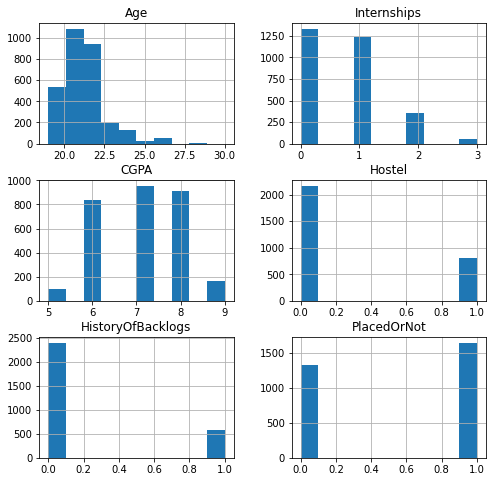

In [5]:
place_data.hist(figsize=(8,8))
plt.show()

In [6]:
place_data.isnull().sum()

Age                  0
Gender               0
Stream               0
Internships          0
CGPA                 0
Hostel               0
HistoryOfBacklogs    0
PlacedOrNot          0
dtype: int64

In [7]:
place_data['Gender'].value_counts()

Male      2475
Female     491
Name: Gender, dtype: int64

In [8]:
place_data['Stream'].value_counts()

Computer Science                 776
Information Technology           691
Electronics And Communication    424
Mechanical                       424
Electrical                       334
Civil                            317
Name: Stream, dtype: int64

In [9]:
encoder = LabelEncoder()
place_data['Gender'] = encoder.fit_transform(place_data['Gender'])
place_data['Stream'] = encoder.fit_transform(place_data['Stream'])

In [10]:
place_data['Gender'].value_counts()

1    2475
0     491
Name: Gender, dtype: int64

In [11]:
place_data['Stream'].value_counts()

1    776
4    691
3    424
5    424
2    334
0    317
Name: Stream, dtype: int64

In [12]:
place_data.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,1,3,1,8,1,1,1
1,21,0,1,0,7,1,1,1
2,22,0,4,1,6,0,0,1
3,21,1,4,0,8,0,1,1
4,22,1,5,0,8,1,0,1


In [13]:
place_data.to_csv('new_data.csv')

In [14]:
X = place_data.drop(columns='PlacedOrNot',axis=1)
Y = place_data['PlacedOrNot']

In [15]:
Y.value_counts()

1    1639
0    1327
Name: PlacedOrNot, dtype: int64

In [16]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=42)

In [17]:
model = RandomForestClassifier()
model.fit(X_train, Y_train)

RandomForestClassifier()

In [18]:
train_prediction = model.predict(X_train)
train_accuracy = accuracy_score(train_prediction, Y_train)
train_accuracy

0.9236930860033726

In [19]:
test_prediction = model.predict(X_test)
test_accuracy = accuracy_score(test_prediction, Y_test)
test_accuracy

0.8754208754208754

In [20]:
#Predictive System
